In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\USER\Downloads\eloor23.csv")
data

,PARAMETERS,PM10,PM2.5,SO2,CO,NO2,NH3,O3,AQI
0,01/01/2023,56.04,21.71,5.78,0.53,15.31,4.83,29.95,56.0
1,01/02/2023,57.69,22.62,0.12,0.56,15.05,4.75,30.92,58.0
2,01/03/2023,75.16,41.81,4.99,0.79,9.92,7.56,32.67,75.0
3,01/04/2023,71.66,38.42,6.14,0.92,15.12,9.33,29.93,72.0
4,01/05/2023,68.35,34.80,7.63,1.09,20.95,11.41,26.98,68.0
...,...,...,...,...,...,...,...,...,...
732,12/27/2024,54.48,39.25,4.50,0.65,6.31,3.17,11.09,65.0
733,12/28/2024,52.45,37.22,4.51,0.73,6.19,3.15,11.59,62.0
734,12/29/2024,56.45,41.21,4.51,0.65,6.26,3.16,11.94,62.0
735,12/30/2024,53.50,38.27,4.47,0.59,6.23,3.15,11.19,65.0


In [2]:
x=data[["PM10","PM2.5","NO2","SO2","CO","O3","NH3"]]
x

,PM10,PM2.5,NO2,SO2,CO,O3,NH3
0,56.04,21.71,15.31,5.78,0.53,29.95,4.83
1,57.69,22.62,15.05,0.12,0.56,30.92,4.75
2,75.16,41.81,9.92,4.99,0.79,32.67,7.56
3,71.66,38.42,15.12,6.14,0.92,29.93,9.33
4,68.35,34.80,20.95,7.63,1.09,26.98,11.41
...,...,...,...,...,...,...,...
732,54.48,39.25,6.31,4.50,0.65,11.09,3.17
733,52.45,37.22,6.19,4.51,0.73,11.59,3.15
734,56.45,41.21,6.26,4.51,0.65,11.94,3.16
735,53.50,38.27,6.23,4.47,0.59,11.19,3.15


In [3]:
y=data['AQI']
y

0      56.0
1      58.0
2      75.0
3      72.0
4      68.0
       ... 
732    65.0
733    62.0
734    62.0
735    65.0
736    61.0
Name: AQI, Length: 737, dtype: float64

In [4]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaledx=scale.fit_transform(x)
scaledx

array([[ 0.023794  , -0.55380528,  1.17954443, ..., -1.28652564,
         1.29771512,  0.37845363],
       [ 0.10469276, -0.49351902,  1.13984388, ..., -1.17331138,
         1.4166252 ,  0.35211441],
       [ 0.961239  ,  0.7777923 ,  0.35652152, ..., -0.30533542,
         1.6311537 ,  1.27727946],
       ...,
       [ 0.04389612,  0.73804312, -0.20234005, ..., -0.83366862,
        -0.91008958, -0.17137756],
       [-0.10074106,  0.54327213, -0.20692089, ..., -1.06009713,
        -1.00203036, -0.17466996],
       [-0.17036302,  0.44919907, -0.21302866, ..., -0.6072401 ,
        -1.04371018, -0.17466996]], shape=(737, 7))

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.2,random_state=0)
x_train.shape

(589, 7)

<Axes: xlabel='AQI', ylabel='Count'>

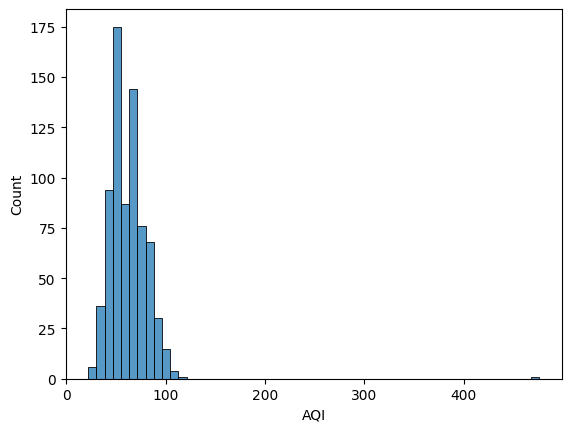

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='AQI',data=data)

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred=reg.predict(x_test)
y_pred

array([ 69.66094899,  68.166967  ,  61.6990869 ,  71.8075574 ,
        42.72973032,  54.56767829,  59.42528678,  62.007553  ,
        53.11323313, 101.39860634,  60.82142219,  30.05436809,
        90.89851775,  76.77295675,  71.32727358,  64.66678264,
        43.09265898,  48.26021326,  63.46565569,  73.18762624,
        47.49320225,  97.32142465,  48.28122624,  65.0463012 ,
        60.33775267,  67.44623937,  68.34565014,  60.2199729 ,
        59.36829585,  57.8051207 ,  61.43136202,  73.27829332,
        58.43276816,  75.98624658,  66.77844478,  46.12548346,
        56.08086423,  55.43753156,  95.72239111,  28.82880167,
        62.51467598,  49.54298437,  47.38601183,  56.80989635,
        62.4545974 ,  59.46275416,  50.20254634,  56.3830303 ,
        77.87585672,  81.39816716,  53.79529596,  70.00984746,
        53.58459028,  11.44430543,  62.25913507,  29.3356948 ,
        31.17589094,  85.06045889,  74.61822263,  58.15519814,
        36.8291314 ,  51.02858567,  52.865869  ,  26.76

In [9]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 47.07453002534452


In [10]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 6.861088107971251


In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.825538853476676

In [17]:
import pickle
filename='aqiel.pkl'
pickle.dump(reg,open(filename,'wb'))

In [13]:
loaded_model=pickle.load(open(filename,'rb'))

In [16]:
filename='scaleel.pkl'
pickle.dump(scale,open(filename,'wb'))

In [15]:
loaded_scale=pickle.load(open(filename,'rb'))